In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [5]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [6]:
# Parameters
betta = 0.95
alpha = 0.3
delta = 0.1
sigma = 0.25

In [7]:
nk = 200

# Capital Grid
k_min = 0.1
k_max = 5.0
kgrid = np.linspace(k_min, k_max, nk)

# Wealth Grid
wealth_min = 0.35
wealth_max = 6.0
wealth_grid = np.linspace(wealth_min, wealth_max, nk)

In [8]:
# Initial Guess
k_guess = 0.5 * wealth_grid

In [9]:
tol = 1e-6
maxiter = 100
for i in range(maxiter):

    # Capital Choice
    kp = kgrid

    # Production and Wealth Tomorrow
    rp = alpha * kp ** (alpha - 1) + 1 - delta
    wp = kp ** alpha + (1 - delta) * kp

    # Capital Choice Tomorrow
    interp = scipy.interpolate.interp1d(wealth_grid, k_guess, kind='linear', fill_value='extrapolate')
    kpp = interp(wp)

    # Consumption Tomorrow
    cp = wp - kpp

    # Implied Consumption Today
    c = (betta * rp * cp ** (-sigma)) ** (-1 / sigma)

    # Implied Wealth Today
    w = kp + c

    # Interpolate New Policy
    interp = scipy.interpolate.interp1d(w, kp, kind='linear', fill_value='extrapolate')
    k_new = interp(wealth_grid)

    # Check Convergence
    diff = np.amax(np.abs(k_new - k_guess))
    print(i, diff)
    if diff < tol:
        break

    # Update Guess
    k_guess = k_new.copy()

0 0.46511099370196307
1 0.2534982433648816
2 0.1473520580130816
3 0.08921255061764599
4 0.05546154360033517
5 0.035079326852886616
6 0.022437897545126262
7 0.014457533613311035
8 0.009360229334959946
9 0.006077894326010025
10 0.003955302521934989
11 0.0025772679309250535
12 0.0016806832287068474
13 0.001096359724782836
14 0.0007157503300945223
15 0.0004673038015114983
16 0.0003051156779063646
17 0.00019925855348112975
18 0.00013015392388560088
19 8.50026615069055e-05
20 5.551398386227646e-05
21 3.6250624749101235e-05
22 2.367202095054921e-05
23 1.5459613236679104e-05
24 1.0096962622441197e-05
25 6.594704596629697e-06
26 4.3072993944903715e-06
27 2.8133056071411033e-06
28 1.8375103012502336e-06
29 1.200171398707539e-06
30 7.8389380764321e-07


In [11]:
# Projection on capital
interp1 = scipy.interpolate.interp1d(wp, kp, kind='linear', fill_value='extrapolate')
k_today = interp1(w)
k_today = np.maximum(k_today, 0.0)

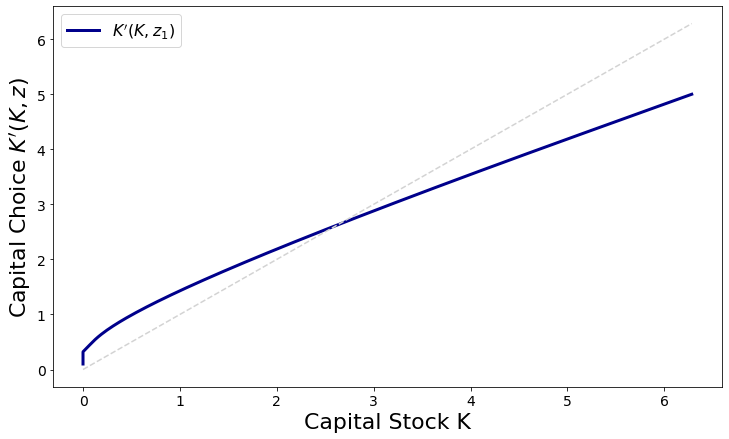

In [13]:
fig,ax=plt.subplots(figsize=(12,7))
ax.plot(k_today,kgrid,color="darkblue",linewidth=3,label="$K'(K,z_{1})$")
ax.plot(k_today, k_today, color='lightgrey', linestyle='dashed')

ax.set_ylabel("Capital Choice $K'(K,z)$", fontsize=22)
ax.set_xlabel("Capital Stock K", fontsize=22)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

plt.legend(fontsize= 16, loc='upper left')
plt.show()